https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
%config Completer.use_jedi = False

In [2]:
# data analysis and warning
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machin learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv('../data/original_data/train.csv')
test = pd.read_csv('../data/original_data/test.csv')
combine = [train, test]

# Analyze by describing data

## which feature are available in the dataset?

In [8]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# preview data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# preview data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Null values count
print('+'*40)
train.info()
print('='*40)
test.info()
print('+'*40)

++++++++++++++++++++++++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.describe(include=['O']) # object colunms

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thayer, Mr. John Borland Jr",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
print(681 / 891 * 100)

76.43097643097643


- 티켓의 경우 count에 비해 unique 가 매우 낮은 것을 볼 수 있는데 22% 정도의 손실이다.
- 이정도 중복(duplicates)가 존재하면 유의미한 데이터라고 보기 힘들다.
- 이런 판단을 위해서는 티켓과 생존의 correlation 을 상펴보아야한다. (아마 없을 것이다.)

In [11]:
train[["Ticket","Survived"]].groupby("Ticket").mean()

,Survived
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110564,1.000000
110813,1.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.000000


중복된 확률이 매우 많은것으로 보아 유의미한 값을 얻기는 힘들다.

In [12]:
print("train")
print(204 / 891 * 100)

print("test")
print(91 / 418 * 100)

train
22.895622895622896
test
21.770334928229666


- Cabin 데이터는 80% 정도의 높은 결측률을 가진 데이터다.
- 이러한 결측률은 test 에서도 동일하다.
- 따라서 이번 예측에서 제외하도록 한다.

## Analyze by pivoting feature

In [13]:
# Pclass 별 인원 중 살아남은 사람 수의 비
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- Pclass 가 3 인경우 굉장히 많이 살아남는 것을 볼 수 있다.
- 각 Pclass 값에 따라 유의미하게 확률이 나뉘는 것을 알 수 있다.

In [14]:
# Sex 별 인원 중 살아남은 사람 수의 비
train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


- female 의 경우 더 많이 살아남는 것을 확인할 수 있다.
- 유의미한 확률 차이를 보인다.

In [15]:
# SibSp 수 별 인원 중 생존자 수의 비
train[["SibSp", "Survived"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


- 5와 8의 경우 확률의 차이를 구분할 수 없으므로 직접적으로 사용할 수 없다고 판단된다.

In [16]:
# Parch 수 별 인원 중 생존자 수의 비
train[["Parch", "Survived"]].groupby("Parch").mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


- 1과 2 를 구분할 수 없다.
- 4와 6 을 구분할 수 없다.
- 직접적으로 유의미한 값을 가진다고 보기는 힘들다.

In [17]:
_train = train.drop(["Ticket", "Cabin"], axis = 1)
_test = test.drop(["Ticket", "Cabin"], axis = 1)
_combine = [_train, _test]

- 결측률이 80%인 Ticket과 Cabin을 버렸다.

In [18]:
for dataset in _combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand = False)

pd.crosstab(_train.Title, _train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 가정 : 이름은 완전히 unique 한 데이터로 얻어낼 수 있는 정보가 있을 것이다.
- 이름 중에서 범주화 시킬 수 있는 부분인 호칭을 분류했다.
- 같은 의미를 가지고 있지만 다르게 표기된 항목들을 하나로 묶어줄 수 있다.
- 차지하고 있는 수가 적은 항목들은 Rare 라는 하나의 항목으로 묶을 수 있다.

In [19]:
for dataset in _combine:
    # Rare Title
    dataset["Title"] = \
    dataset["Title"].replace(
        to_replace = ["Capt","Col","Countess","Don","Dr",
                      "Jonkheer","Lady","Major","Rev","Sir"],
        value = "Rare"
    )
    
    # Same as Miss
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    
    # Same as Mrs
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

_train[["Title", "Survived"]].groupby(["Title"]).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


- 여성의 칭호는 굉장히 높은 확률로 살아남고 남성의 성중에서는 Master 의 생존 확률이 높다는 것을 알 수 있다.
- 모든 값의 생존 확률이 유의미한 기준으로 잘 나뉘었음을 알 수 있다.

In [20]:
title_mapping = {
    "Mrs"    : 1,
    "Miss"   : 2,
    "Rare"   : 3,
    "Master" : 4,
    "Mr"     : 5,
    
}
for dataset in _combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,5


- Name으로부터 유의미한 카테고리인 Title을 추출했기 때문에 이제 Name을 데이터에서 제거해도 된다.
- 필요없는 PassengerId 도 함께 제거한다.

In [21]:
_train = _train.drop(["Name","PassengerId"], axis=1)
_test = _test.drop(["Name"], axis=1)
_combine = [_train, _test]

print(_train.shape, _test.shape)
_train.head()

(891, 9) (418, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,5
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,5


- Sex를 숫자로 바꾸자

In [22]:
Sex_mapping = {
    "female" : 1,
    "male"   : 0
}
for dataset in _combine:
    dataset["Sex"] = dataset["Sex"].map(Sex_mapping).astype(int)
_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,5
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,5


- 결측치를 추정할때
1. 나이를 추정해서 넣어줄때 전체 평균과 분산을 구한 다음 랜덤 넘버로 넣어줄 수 있다.
2. 더 정확하게는 서로 상관관계가 있는 데이터에 기반하여 median을 넣어줄 수도 있다.
3. 1과 2를 모두 사용할 수도 있다.

여기서는 2를 사용하겠다.

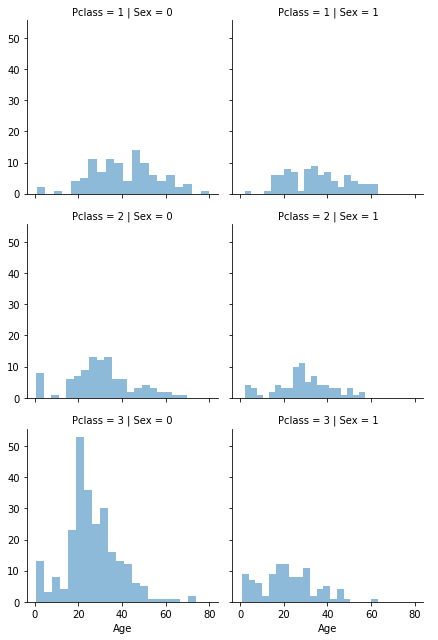

In [23]:
grid = sns.FacetGrid(_train, row = 'Pclass', col = 'Sex')
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend()

- Pclass 와 성별을 이용해서 median 값을 얻고 결측치를 채워넣자.
- 성별은 2개이고 Pclass는 3개 이므로 아래와 같이 선언한다.

In [24]:
guess_ages = np.zeros((2,3))

In [25]:
for dataset in _combine:
    for i in [0, 1]: # Sex
        for j in [1, 2, 3]: # Pclass
            guess = dataset[
                (dataset.Sex == i) &\
                (dataset.Pclass == j)
            ]["Age"].dropna()
            
            # age_mean = guess.mean()
            # age_std = guess.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            # method 2
            age_guess = guess.median()
            
            guess_ages[i,j-1] = int(age_guess/0.5 + 0.5) * 0.5
    
    for i in [0, 1]:
        for j in [1, 2, 3]:
            dataset.loc[
                (dataset.Sex == i) &\
                (dataset.Pclass == j) &\
                (dataset.Age.isnull()),
                "Age"
            ] = guess_ages[i,j-1]
    dataset["Age"] = dataset["Age"].astype(int)

In [26]:
_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,5
1,1,1,1,38,1,0,71.2833,C,1
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,1
4,0,3,0,35,0,0,8.0500,S,5


- 이제 Age 를 나눠서 AgeBand 를 만들어 보자.

In [27]:
_train["AgeBand"] = pd.cut(_train["Age"], 5)
_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,5,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,5,"(32.0, 48.0]"


In [28]:
_train[["AgeBand", "Survived"]].groupby("AgeBand").mean()

,Survived
AgeBand,
"(-0.08, 16.0]",0.550000
"(16.0, 32.0]",0.337374
"(32.0, 48.0]",0.412037
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


In [29]:
for dataset in _combine:
    dataset.loc[(dataset.Age <= 16), "Age"] = 0
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), "Age"] = 1
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), "Age"] = 2
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), "Age"] = 3
    dataset.loc[(dataset.Age > 64), "Age"] = 4

In [30]:
_train = _train.drop(['AgeBand'], axis=1)
_combine = [_train, _test]
_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,5
1,1,1,1,2,1,0,71.2833,C,1
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,1
4,0,3,0,2,0,0,8.0500,S,5


In [31]:
for dataset in _combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [32]:
_train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


- 2명인 경우와 3명인 경우를 구분할 수 없다.
- 1명인 경우와 7명인 경우를 구분할 수 없다.

In [33]:
for dataset in _combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [34]:
_train[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [35]:
_train = _train.drop(["Parch", "SibSp", "FamilySize"], axis = 1)
_test = _test.drop(["Parch", "SibSp", "FamilySize"], axis = 1)
_combine = [_train, _test]

In [36]:
_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,5,0
1,1,1,1,2,71.2833,C,1,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,1,0
4,0,3,0,2,8.0500,S,5,1


In [37]:
for dataset in _combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


- 가장 많이 탄 항구에서 사람들이 더 탔을 가능성이 크므로 선착장 결측치는 최빈값으로 대체한다.

In [38]:
freq_port = _train.Embarked.dropna().mode()[0]
freq_port

'S'

In [39]:
for dataset in _combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [40]:
Embarked_mapping = {
    "S" : 0,
    "Q" : 1,
    "C" : 2,
}

for dataset in _combine:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping).astype(int)

_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,5,0,3
1,1,1,1,2,71.2833,2,1,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,1,0,2
4,0,3,0,2,8.0500,0,5,1,6


- 테스트 데이터에 Fare 결측치가 있는데 이건 그냥 중간 값으로 하자.
- 더 좋은 방법은 티켓이나 호실번호 또는 Pclass 에 맞게 넣는 것이다.

In [41]:
_test['Fare'].fillna(_test['Fare'].dropna().median(), inplace=True)
_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,1,5.0,1,6
1,893,3,1,2,7.0000,0,1.0,0,6
2,894,2,0,3,9.6875,1,5.0,1,6
3,895,3,0,1,8.6625,0,5.0,1,3
4,896,3,1,1,12.2875,0,1.0,0,3


In [42]:
_train['FareBand'] = pd.qcut(_train['Fare'], 4)
_train[['FareBand', 'Survived']].groupby(['FareBand']).mean()

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [43]:
for dataset in _combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

_train = _train.drop(['FareBand'], axis=1)
_combine = [_train, _test]

_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,5,0,3
1,1,1,1,2,3,2,1,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,1,0,2
4,0,3,0,2,1,0,5,1,6
5,0,3,0,1,1,1,5,1,3
6,0,1,0,3,3,0,5,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,1,0,3
9,1,2,1,0,2,2,1,0,0


In [44]:
_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,1,5.0,1,6
1,893,3,1,2,0,0,1.0,0,6
2,894,2,0,3,1,1,5.0,1,6
3,895,3,0,1,1,0,5.0,1,3
4,896,3,1,1,1,0,1.0,0,3


- ML을 위한 데이터셋 만들기

In [45]:
X_train = _train.drop("Survived", axis=1)
Y_train = _train["Survived"]
X_test  = _test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [46]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.28

In [47]:
data = {
    "PassengerId" : _test["PassengerId"],
    "Survived"    : Y_pred
}
data = pd.DataFrame(data)
data.to_csv("knn_predict.csv",index = False)

In [48]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.48

In [49]:
data = {
    "PassengerId" : _test["PassengerId"],
    "Survived"    : Y_pred
}
data = pd.DataFrame(data)
data.to_csv("svc_predict.csv",index = False)

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [51]:
data = {
    "PassengerId" : _test["PassengerId"],
    "Survived"    : Y_pred
}
data = pd.DataFrame(data)
data.to_csv("logreg_predict.csv",index = False)

In [52]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
acc_RFC = round(RFC.score(X_train, Y_train) * 100, 2)
acc_RFC

86.64

In [53]:
data = {
    "PassengerId" : _test["PassengerId"],
    "Survived"    : Y_pred
}
data = pd.DataFrame(data)
data.to_csv("RFC_predict.csv",index = False)

In [54]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
Y_pred = GNB.predict(X_test)
acc_GNB = round(GNB.score(X_train, Y_train) * 100, 2)
acc_GNB

78.34

In [55]:
pctrn = Perceptron()
pctrn.fit(X_train,Y_train)
Y_pred = pctrn.predict(X_test)
acc_GNB = round(GNB.score(X_train, Y_train) * 100, 2)
acc_GNB

78.34

In [56]:
import tensorflow as tf

In [57]:
inputs = tf.keras.Input((8))
x = tf.keras.layers.Dense(6, activation = 'relu',use_bias = True)(inputs)
x = tf.keras.layers.Dense(4, activation = 'relu',use_bias = True)(x)
x = tf.keras.layers.Dense(3, activation = 'relu',use_bias = True)(x)
outs = tf.keras.layers.Dense(2, activation = 'softmax',use_bias = True)(x)
DenseNet = tf.keras.Model(inputs, outs)

In [58]:
loss_fn = tf.keras.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.SGD(1e-2)
acc_fn = tf.keras.metrics.BinaryAccuracy()

In [59]:
for step in range(1000 * len(_train)//64):
    samples = _train.sample(64)
    X = samples.drop("Survived", axis = 1)
    Y = tf.one_hot(samples.Survived.to_numpy().astype(np.float32), 2)
    
    acc_fn.reset_states()
    with tf.GradientTape() as tape:
        _Y = DenseNet(X.to_numpy().astype(np.float32))
        L = loss_fn(_Y, Y)
        
        acc_fn.update_state(_Y,Y)
    grads = tape.gradient(L, DenseNet.trainable_variables)
    opt.apply_gradients(zip(grads, DenseNet.trainable_variables))
    
    if not (step + 1) % 500:
        print(f"step_{step} ::: loss_{L} ::: acc_{acc_fn.result()}")

step_499 ::: loss_3.5330963134765625 ::: acc_0.0078125
step_999 ::: loss_4.195899963378906 ::: acc_0.0546875
step_1499 ::: loss_2.685643196105957 ::: acc_0.0859375
step_1999 ::: loss_3.8969080448150635 ::: acc_0.109375
step_2499 ::: loss_4.33950138092041 ::: acc_0.1171875
step_2999 ::: loss_3.389552354812622 ::: acc_0.0625
step_3499 ::: loss_3.380246162414551 ::: acc_0.1328125
step_3999 ::: loss_2.421051502227783 ::: acc_0.140625
step_4499 ::: loss_3.6163957118988037 ::: acc_0.109375
step_4999 ::: loss_3.8546085357666016 ::: acc_0.1171875
step_5499 ::: loss_2.1769607067108154 ::: acc_0.15625
step_5999 ::: loss_2.8914761543273926 ::: acc_0.1796875
step_6499 ::: loss_3.388141632080078 ::: acc_0.09375
step_6999 ::: loss_1.9464936256408691 ::: acc_0.1171875
step_7499 ::: loss_2.663973331451416 ::: acc_0.09375
step_7999 ::: loss_4.570387840270996 ::: acc_0.1328125


KeyboardInterrupt: 

In [ ]:
pd.Timedelta()